---
title: "Linear Regression With Multiple Variable"
description: "Linear Regression with Multiple Variables extends the concept to predict a dependent variable based on two or more independent variables. It involves finding a hyperplane that best fits the data in a multidimensional space, aiming to minimize the difference between observed and predicted outcomes across multiple input features."
author: "Vraj Shah"
date: "8/17/2023"
---


### Libraries Required

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math

### Dataset

In [2]:
x_train = np.array([[2104, 5, 1, 45], [1416, 3, 2, 40], [852, 2, 1, 35]])
y_train = np.array([460, 232, 178])
b = -100
w = np.array([10, -10, 50, -20])

### Finding Function f_wb
$$ f_{\mathbf{w},b}(\mathbf{x}) =  w_0x_0 + w_1x_1 +... + w_{n-1}x_{n-1} + b $$
$$ f_{\mathbf{w},b}(\mathbf{x}) = \mathbf{w} \cdot \mathbf{x} + b   $$ 

In [3]:
def fxn(x, w, b):
    f_wb = np.dot(x, w) + b

    return f_wb

### Finding Cost Function

$$J(\mathbf{w},b) = \frac{1}{2m} \sum\limits_{i = 0}^{m-1} (f_{\mathbf{w},b}(\mathbf{x}^{(i)}) - y^{(i)})^2 $$ 

In [4]:
def cost_fxn(x, y, w, b):
    m = x.shape[0]

    f_wb = fxn(x, w, b)
    cost = (f_wb - y) ** 2
    total_cost = (1 / (2 * m)) * np.sum(cost)

    return total_cost

### Finding dJ/dw and dJ/db


$$
\frac{\partial J(\mathbf{w},b)}{\partial w_j}  = \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{\mathbf{w},b}(\mathbf{x}^{(i)}) - y^{(i)})x_{j}^{(i)} \\
\frac{\partial J(\mathbf{w},b)}{\partial b}  = \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{\mathbf{w},b}(\mathbf{x}^{(i)}) - y^{(i)}) \\
$$

In [5]:
def compute_gradient(x, y, w, b):
    m = x.shape[0]
    a = fxn(x, w, b) - y
    dj_dw = (np.dot(a, x))/m
    dj_db = np.sum(a)/m
    return dj_dw, dj_db

### Gradient Descent

$$\begin{align*} \text{repeat}&\text{ until convergence:} \; \lbrace \newline\;
& w_j = w_j -  \alpha \frac{\partial J(\mathbf{w},b)}{\partial w_j}  \; & \text{for j = 0..n-1}\newline
&b\ \ = b -  \alpha \frac{\partial J(\mathbf{w},b)}{\partial b}  \newline \rbrace
\end{align*}$$ 

Iteration    0: Cost 3.85e+06, w: [ -1.03240533 -10.02538967  49.99110867 -20.27834   ], b: -100.00670833333334
Iteration 10000: Cost 8.71e+03, w: [  0.58117979 -10.02160299  50.21100127 -13.2564183 ], b: -99.75760289212182
Iteration 20000: Cost 4.63e+03, w: [  0.467721   -10.00429679  50.3020335   -8.78158635], b: -99.59764948351305
Iteration 30000: Cost 2.95e+03, w: [ 0.39492336 -9.97570356 50.311448   -5.91048217], b: -99.49414563632797
Iteration 40000: Cost 2.26e+03, w: [ 0.34819099 -9.93989568 50.26860068 -4.06742547], b: -99.42682903727315
Iteration 50000: Cost 1.97e+03, w: [ 0.31816743 -9.89948366 50.19230962 -2.88338545], b: -99.38271084836177
Iteration 60000: Cost 1.85e+03, w: [ 0.29885486 -9.85614089 50.09463778 -2.12180075], b: -99.35346477833464
Iteration 70000: Cost 1.80e+03, w: [ 0.28640849 -9.81094006 49.98331786 -1.63102743], b: -99.33375338803842
Iteration 80000: Cost 1.77e+03, w: [ 0.27836366 -9.76456876 49.86330674 -1.3138565 ], b: -99.32015519486049
Iteration 90000:

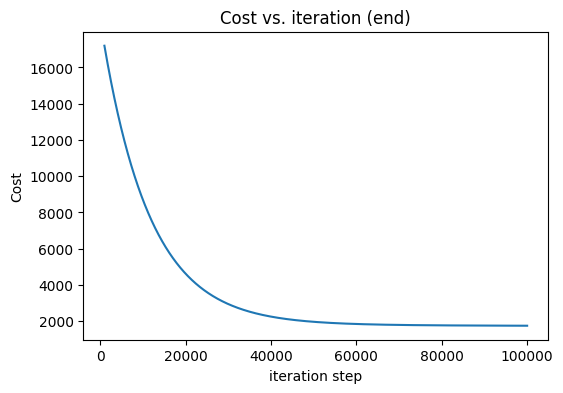

In [6]:
def gradient_descent(x, y, w, b, alpha, num_iters):
    J_history = []
    p_history = []

    for i in range(num_iters + 1):
        dj_dw, dj_db = compute_gradient(x, y, w, b)
        w = w - alpha * dj_dw
        b = b - alpha * dj_db

        cost = cost_fxn(x, y, w, b)
        J_history.append(cost)
        p_history.append((w, b))

        if i % math.ceil(num_iters / 10) == 0:
            print(f"Iteration {i:4}: Cost {cost:.2e}, w: {w}, b: {b}")

    return w, b, J_history, p_history


iterations = 100000
tmp_alpha = 5.0e-7

w_final, b_final, J_hist, p_hist = gradient_descent(
    x_train, y_train, w, b, tmp_alpha, iterations)
print(f"(w,b) found by gradient descent: {w_final},{b_final}")


f_wb = fxn(x_train, w_final, b_final)
print("Cost is", cost_fxn(x_train, y_train, w_final, b_final))

fig, ax = plt.subplots(figsize=(6, 4))
ax.plot(1000 + np.arange(len(J_hist[1000:])), J_hist[1000:])
ax.set_title("Cost vs. iteration (end)")
ax.set_ylabel('Cost')
ax.set_xlabel('iteration step')
plt.show()